In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import statsmodels.api as sm

In [2]:
data1=pd.read_excel('equi2020.xlsx',engine='openpyxl')
data2=pd.read_excel('equi2021.xlsx',engine='openpyxl')
data12 = pd.merge(data1, data2, on='COM', how='left')

In [6]:
'''data12['NTLBIN'] = data12['N TL_x'].apply(lambda x:0 if x==0 else 1)
data12=data12.drop('N TL_x',axis=1)
data12=data12.drop('N TL_y',axis=1)'''
data12

,COM,SumOfNB_EQUIP_x,SumOfNB_EQUIP1_x,SumOfNB_EQUIP2_x,SumOfNB_EQUIP2_y,SumOfNB_EQUIP1_y,SumOfNB_EQUIP_y,NTLBIN
0,16002,24,28,24,24.0,24.0,24.0,0
1,16003,72,120,72,64.0,64.0,88.0,0
2,16005,1272,1880,1060,1080.0,900.0,1520.0,0
3,16007,70,80,70,84.0,70.0,80.0,0
4,16008,6,6,6,7.0,7.0,7.0,0
...,...,...,...,...,...,...,...,...
2744,87199,100,84,60,100.0,60.0,90.0,0
2745,87201,4134,6912,2862,3822.0,2646.0,6588.0,0
2746,87202,261,424,232,243.0,216.0,384.0,0
2747,87203,150,216,150,138.0,138.0,198.0,0


In [21]:
data3=pd.read_excel('revenus2.xlsx',engine='openpyxl')

In [22]:
data3=data3[['Table Centrale.COM','NPERC1_CS2_2410', 'NPERC1_CS2_2423', 'NPERC1_CS2_2469',
       'NPERC1_CS2_2471', 'NPERC2_CS2_2410', 'NPERC2_CS2_2421',
       'NPERC2_CS2_2423', 'NPERC2_CS2_2448', 'NPERC2_CS2_2469',
       'NPERC2_CS2_2471', 'NPERC2_CS2_2472', 'NPERC3_CS2_2410',
       'NPERC3_CS2_2421', 'NPERC3_CS2_2423', 'NPERC3_CS2_2447',
       'NPERC3_CS2_2448', 'NPERC3_CS2_2469', 'NPERC3_CS2_2471',
       'NPERC3_CS2_2472', 'NPERC3_CS2_2473', 'NPERC3_CS2_2476',
       'NPERC3_CS2_2481', 'NPERC4_CS2_2410', 'NPERC4_CS2_2421',
       'NPERC4_CS2_2422', 'NPERC4_CS2_2423', 'NPERC4_CS2_2447',
       'NPERC4_CS2_2448', 'NPERC4_CS2_2454', 'NPERC4_CS2_2455',
       'NPERC4_CS2_2456', 'NPERC4_CS2_2466', 'NPERC4_CS2_2469',
       'NPERC4_CS2_2471', 'NPERC4_CS2_2472', 'NPERC4_CS2_2473',
       'NPERC4_CS2_2476', 'NPERC4_CS2_2481', 'NPERC5_CS2_2410',
       'NPERC5_CS2_2421', 'NPERC5_CS2_2422', 'NPERC5_CS2_2423',
       'NPERC5_CS2_2441', 'NPERC5_CS2_2446', 'NPERC5_CS2_2447',
       'NPERC5_CS2_2448', 'NPERC5_CS2_2451', 'NPERC5_CS2_2454',
       'NPERC5_CS2_2455', 'NPERC5_CS2_2456', 'NPERC5_CS2_2461',
       'NPERC5_CS2_2466', 'NPERC5_CS2_2469', 'NPERC5_CS2_2471',
       'NPERC5_CS2_2472', 'NPERC5_CS2_2473', 'NPERC5_CS2_2476',
       'NPERC5_CS2_2481', 'NPERC5_CS2_2482', 'NPERC6_CS2_2410',
       'NPERC6_CS2_2421', 'NPERC6_CS2_2422', 'NPERC6_CS2_2423',
       'NPERC6_CS2_2431', 'NPERC6_CS2_2432', 'NPERC6_CS2_2436',
       'NPERC6_CS2_2441', 'NPERC6_CS2_2446', 'NPERC6_CS2_2447',
       'NPERC6_CS2_2448', 'NPERC6_CS2_2451', 'NPERC6_CS2_2454',
       'NPERC6_CS2_2455', 'NPERC6_CS2_2456', 'NPERC6_CS2_2461',
       'NPERC6_CS2_2466', 'NPERC6_CS2_2469', 'NPERC6_CS2_2471',
       'NPERC6_CS2_2472', 'NPERC6_CS2_2473', 'NPERC6_CS2_2476',
       'NPERC6_CS2_2481', 'NPERC6_CS2_2482', 'MED16', 'PBEN16', 'PPMINI16']]

In [23]:
data3

,Table Centrale.COM,NPERC1_CS2_2410,NPERC1_CS2_2423,NPERC1_CS2_2469,NPERC1_CS2_2471,NPERC2_CS2_2410,NPERC2_CS2_2421,NPERC2_CS2_2423,NPERC2_CS2_2448,NPERC2_CS2_2469,...,NPERC6_CS2_2469,NPERC6_CS2_2471,NPERC6_CS2_2472,NPERC6_CS2_2473,NPERC6_CS2_2476,NPERC6_CS2_2481,NPERC6_CS2_2482,MED16,PBEN16,PPMINI16
0,16015,11,19,57,8,6,100,21,45,33,...,0,0,0,0,4,25,29,18163.333333,6.0,4.6
1,16028,10,5,45,45,15,10,15,5,15,...,0,0,0,0,0,0,0,18164.761905,5.9,3.4
2,16061,0,0,0,17,5,16,16,11,0,...,0,0,0,0,0,0,0,21306.111111,4.7,1.0
3,16078,0,0,0,11,10,26,0,10,0,...,0,0,0,0,0,0,0,22695.217391,5.2,0.9
4,16085,0,10,5,20,5,5,0,10,0,...,0,0,0,0,0,0,0,18266.500000,5.1,2.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,86281,10,0,0,65,20,15,5,10,0,...,0,0,0,0,0,0,0,20543.500000,5.2,1.1
513,86293,5,0,10,25,0,15,0,0,5,...,0,0,0,0,0,0,0,20133.333333,5.0,2.1
514,86294,0,0,10,20,5,5,5,10,0,...,0,0,0,0,0,0,0,20796.666667,4.0,1.2
515,86297,10,10,0,5,5,5,0,20,0,...,0,0,0,0,0,0,0,23036.538462,4.3,0.9


In [24]:
data3.rename(columns={'Table Centrale.COM': 'COM'}, inplace=True)

In [26]:
data123 = pd.merge(data12, data3, on='COM', how='outer')
data123 

,COM,SumOfNB_EQUIP_x,SumOfNB_EQUIP1_x,SumOfNB_EQUIP2_x,SumOfNB_EQUIP2_y,SumOfNB_EQUIP1_y,SumOfNB_EQUIP_y,NTLBIN,NPERC1_CS2_2410,NPERC1_CS2_2423,...,NPERC6_CS2_2469,NPERC6_CS2_2471,NPERC6_CS2_2472,NPERC6_CS2_2473,NPERC6_CS2_2476,NPERC6_CS2_2481,NPERC6_CS2_2482,MED16,PBEN16,PPMINI16
0,16002,24,28,24,24.0,24.0,24.0,0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,16003,72,120,72,64.0,64.0,88.0,0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,16005,1272,1880,1060,1080.0,900.0,1520.0,0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,16007,70,80,70,84.0,70.0,80.0,0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,16008,6,6,6,7.0,7.0,7.0,0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2744,87199,100,84,60,100.0,60.0,90.0,0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2745,87201,4134,6912,2862,3822.0,2646.0,6588.0,0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2746,87202,261,424,232,243.0,216.0,384.0,0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2747,87203,150,216,150,138.0,138.0,198.0,0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [27]:
data41=pd.read_excel('dem1.xlsx',engine='openpyxl')
data42=pd.read_excel('dem2.xlsx',engine='openpyxl')
data41.rename(columns={'Évolution et Structure de la Population 1999.COM': 'COM'}, inplace=True)
data41=data41[['N TL','COM','Pop 15 ans ou plus Agriculteurs exploitants en 1999 (compl)',
       'Pop Hommes 90 ans ou plus en 2010 (princ)',
       'Pop 15 ans ou plus Hommes Agriculteurs exploitants en 2010 (comp',
       'Pop 15-24 ans Agriculteurs exploitants en 2010 (compl)',
       'Pop 15-24 ans Artisans, Comm, Chefs entr en 2010 (compl)',
       'P20_POP01P_IRAN3', 'P20_POP55P_IRAN3P', 'C20_POP2554_CS1',
       'C20_POP55P_CS1']]
data42.rename(columns={'Table Centrale.COM': 'COM'}, inplace=True)
data42=data42[['COM','PCT','NVAC18','SUP_GEO','AU2010','CATAU2010','TAU2010_RP17']]
data4=pd.merge(data41, data42, on='COM', how='outer')

In [28]:
data5=pd.merge(data4, data123, on='COM', how='outer')

In [30]:
data5=data5.drop(columns='NTLBIN',axis=1)

In [31]:
data6=pd.read_csv('emploifin.csv')

In [32]:
data5=data5.drop('N TL',axis=1)
data56=pd.merge(data5, data6, on='COM', how='outer')


In [34]:
data71=pd.read_excel('etab2017.xlsx',engine='openpyxl')
data71=data71[['COM','ET_C2', 'ET_C3', 'ET_C4', 'ETAZ017', 'ETBE017', 'ETFZ017', 'ETGZ017',
       'ETAZ117', 'ETAZ1017', 'ETAZ5017', 'ETPBE1017', 'ETPFZ1017',
       'ETPBE2017', 'ETPFZ2017', 'ETPBE5017', 'ETPFZ5017', 'ETPGZ5017',
       'ETPAZCP17', 'ETPFZCP17', 'ETPGZCP17', 'ETPOQCP17', 'ETPRESPUB17',
       'ETNPRESPUB17', 'ETPNPRESPUB17', 'ETASSMAT17', 'EFF_DE', 'EFF_C1',
       'EFF_C2', 'EFF_C3', 'EFF_C4', 'EFF_C5', 'EFF_HZ', 'EFF_JZ', 'EFF_KZ']]

data72=pd.read_excel('etab2020.xlsx',engine='openpyxl')
data72.rename(columns={'Caractéristiques des établissements 2021.COM': 'COM'}, inplace=True)
data72=data72[['COM','ETBE021', 'ETFZ021', 'ETGZ021', 'ETOQ021', 'ETAZ1021', 'ETAZ2021',
       'ETFZ2021', 'ETAZ5021', 'ETFZ5021', 'ETPAZ121', 'ETPBE1021',
       'ETPBE2021', 'ETPGZ5021', 'ETPAZCP21', 'ETPBECP21', 'ETPFZCP21',
       'ETPGZCP21', 'ETNPRESPUB21', 'ETPPRESPUB21', 'ETPNPRESPUB21',
       'ETASSMAT21', 'EFF_DE', 'EFF_C1', 'EFF_C2', 'EFF_C3', 'EFF_C4',
       'EFF_HZ', 'EFF_KZ', 'ET_DE', 'ET_C2', 'ET_C3', 'ET_C4']]

data7=pd.merge(data71, data72, on='COM', how='outer')

In [36]:
data8 = pd.merge(data7, data56, on='COM', how='outer')

In [37]:
data8

,COM,ET_C2_x,ET_C3_x,ET_C4_x,ETAZ017,ETBE017,ETFZ017,ETGZ017,ETAZ117,ETAZ1017,...,C14_ACT1564_CS1,P14_ACTOCC15P_ILT2,C09_ACT1564_CS1,C09_AGRILT_SAL,C09_INDUSLT_NSAL,C09_CONSTLT_FNSAL,P09_HSAL15P_EMPAID,P09_ACTOCC15P_ILT3,P09_ACTOCC15P_ILT4,NTLBIN
0,16001,0,0,0,3,0,0,0,0,0,...,23.000000,59.000000,16.000000,0.000000,4.000000,0.000000,1.000000,28.000000,13.000000,0
1,16002,0,0,0,0,0,0,0,0,0,...,4.974333,114.409668,7.476143,0.000000,3.738072,0.000000,0.000000,30.839092,3.738072,0
2,16003,0,0,0,0,0,1,0,1,0,...,8.047847,284.692584,16.137255,8.068627,8.068627,0.000000,1.008578,1.008578,9.077206,0
3,16005,0,0,0,3,0,1,1,1,0,...,23.827845,235.356952,31.949304,0.000000,3.907488,0.000000,4.884360,27.826379,14.130789,0
4,16007,0,0,0,0,0,0,0,5,0,...,29.000000,112.000000,52.000000,4.000000,4.000000,0.000000,0.000000,18.000000,5.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4304,87202,0,0,0,0,0,0,0,3,0,...,15.000000,830.000000,16.000000,0.000000,0.000000,0.000000,3.000000,5.000000,21.000000,0
4305,87203,0,0,0,2,0,1,0,7,1,...,20.424242,507.542424,38.226906,23.361372,0.000000,0.000000,1.911345,23.891816,10.512399,0
4306,87204,0,0,0,1,0,0,0,0,0,...,20.485925,30.678620,20.800000,0.000000,8.320000,0.000000,0.000000,0.000000,6.240000,0
4307,87205,0,0,0,1,0,1,3,11,0,...,54.477156,773.575622,31.952972,11.723921,15.976486,3.994122,0.998530,6.989713,21.967668,0


In [38]:
data9=pd.read_excel('Formations.xlsx',engine='openpyxl')
data9.rename(columns={'Tiers lieux par commune.COM': 'COM'}, inplace=True)
data9=data9[['COM','P09_FSCOL1824','P09_NSCOL15P_CEP','P20_HNSCOL15P_SUP5']]

In [39]:
data10 = pd.merge(data8, data9, on='COM', how='outer')

In [41]:
data11=pd.read_excel('indic.xlsx',engine='openpyxl')
data11.rename(columns={'Table Centrale.COM': 'COM'}, inplace=True)
data11=data11[['COM','uprIPm2', 'nbobs_com', 'nbobs_mail']]

In [43]:
data12=pd.merge(data10, data11, on='COM', how='outer')

In [44]:
data13=pd.read_csv('inficterr.csv')

data13=data13[['COM','i015_A2013',
 'i031_A2013',
 'i033a_A2013',
 'i033b_A2013',
 'i034a_A2013',
 'i034b_A2013',
 'i035a_A2013',
 'i035b_A2013',
 'i061b_A2013',
 'i067_A2013',
 'i081a_A2013',
 'i081b_A2013',
 'i081c_A2013',
 'i081d_A2013',
 'i081f_A2013',
 'i091b_A2013',
 'i092b_A2013',
 'i097_A2013',
 'i114_A2013',
 'i118b_A2013',
 'i015_A2019',
 'i033a_A2019',
 'i033b_A2019',
 'i034a_A2019',
 'i034b_A2019',
 'i036a_A2019',
 'i036c_A2019',
 'i070a_A2019',
 'i070b_A2019',
 'i075b_A2019',
 'i087a_A2019',
 'i087b_A2019',
 'i087c_A2019',
 'i087d_A2019',
 'i091b_A2019',
 'i105c_A2019',
 'i105d_A2019',
 'i105e_A2019',
 'i105f_A2019',
 'i118b_A2019',
 'i120a_A2019']]

In [46]:
data=pd.merge(data12, data13, on='COM', how='outer')

In [48]:
data.drop('COM',axis=1)

,ET_C2_x,ET_C3_x,ET_C4_x,ETAZ017,ETBE017,ETFZ017,ETGZ017,ETAZ117,ETAZ1017,ETAZ5017,...,i087b_A2019,i087c_A2019,i087d_A2019,i091b_A2019,i105c_A2019,i105d_A2019,i105e_A2019,i105f_A2019,i118b_A2019,i120a_A2019
0,0,0,0,3,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,25.00,0.0
1,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,inf,0.0
2,0,0,0,0,0,1,0,1,0,0,...,0.0,0.0,0.0,0.0,1346.94,0.00,0.00,0.0,25.50,0.0
3,0,0,0,3,0,1,1,1,0,0,...,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,41.18,0.0
4,0,0,0,0,0,0,0,5,0,0,...,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,101.00,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4304,0,0,0,0,0,0,0,3,0,0,...,0.0,0.0,0.0,1.0,0.00,0.00,0.00,0.0,25.14,0.0
4305,0,0,0,2,0,1,0,7,1,0,...,0.0,0.0,0.0,0.0,0.04,0.00,0.00,0.0,39.33,0.0
4306,0,0,0,1,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.00,0.37,1626.42,0.0,28.00,0.0
4307,0,0,0,1,0,1,3,11,0,0,...,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,26.56,0.0


In [49]:
data.to_csv('dabtafinale.csv',index=False)

In [2]:
data=pd.read_csv('datafinale.csv')

In [3]:
#numerical_data = data.select_dtypes(exclude=['object'])
correlations = data.corr()['NTLBIN']
#print(correlations)
threshold = -0.3  # Remplacez par le seuil de votre choix

# Filtrer les corrélations supérieures au seuil
filtered_correlations = correlations[correlations.abs() > threshold]

# Afficher les corrélations filtrées
print("\nCorrélations supérieures à", threshold, ":")
print(filtered_correlations)


Corrélations supérieures à -0.3 :
COM            0.017140
ET_C2_x        0.025275
ET_C3_x        0.270977
ET_C4_x        0.259274
ETAZ017        0.088256
                 ...   
i105d_A2019    0.024834
i105e_A2019    0.059927
i105f_A2019    0.017898
i118b_A2019    0.193276
i120a_A2019    0.199439
Name: NTLBIN, Length: 238, dtype: float64


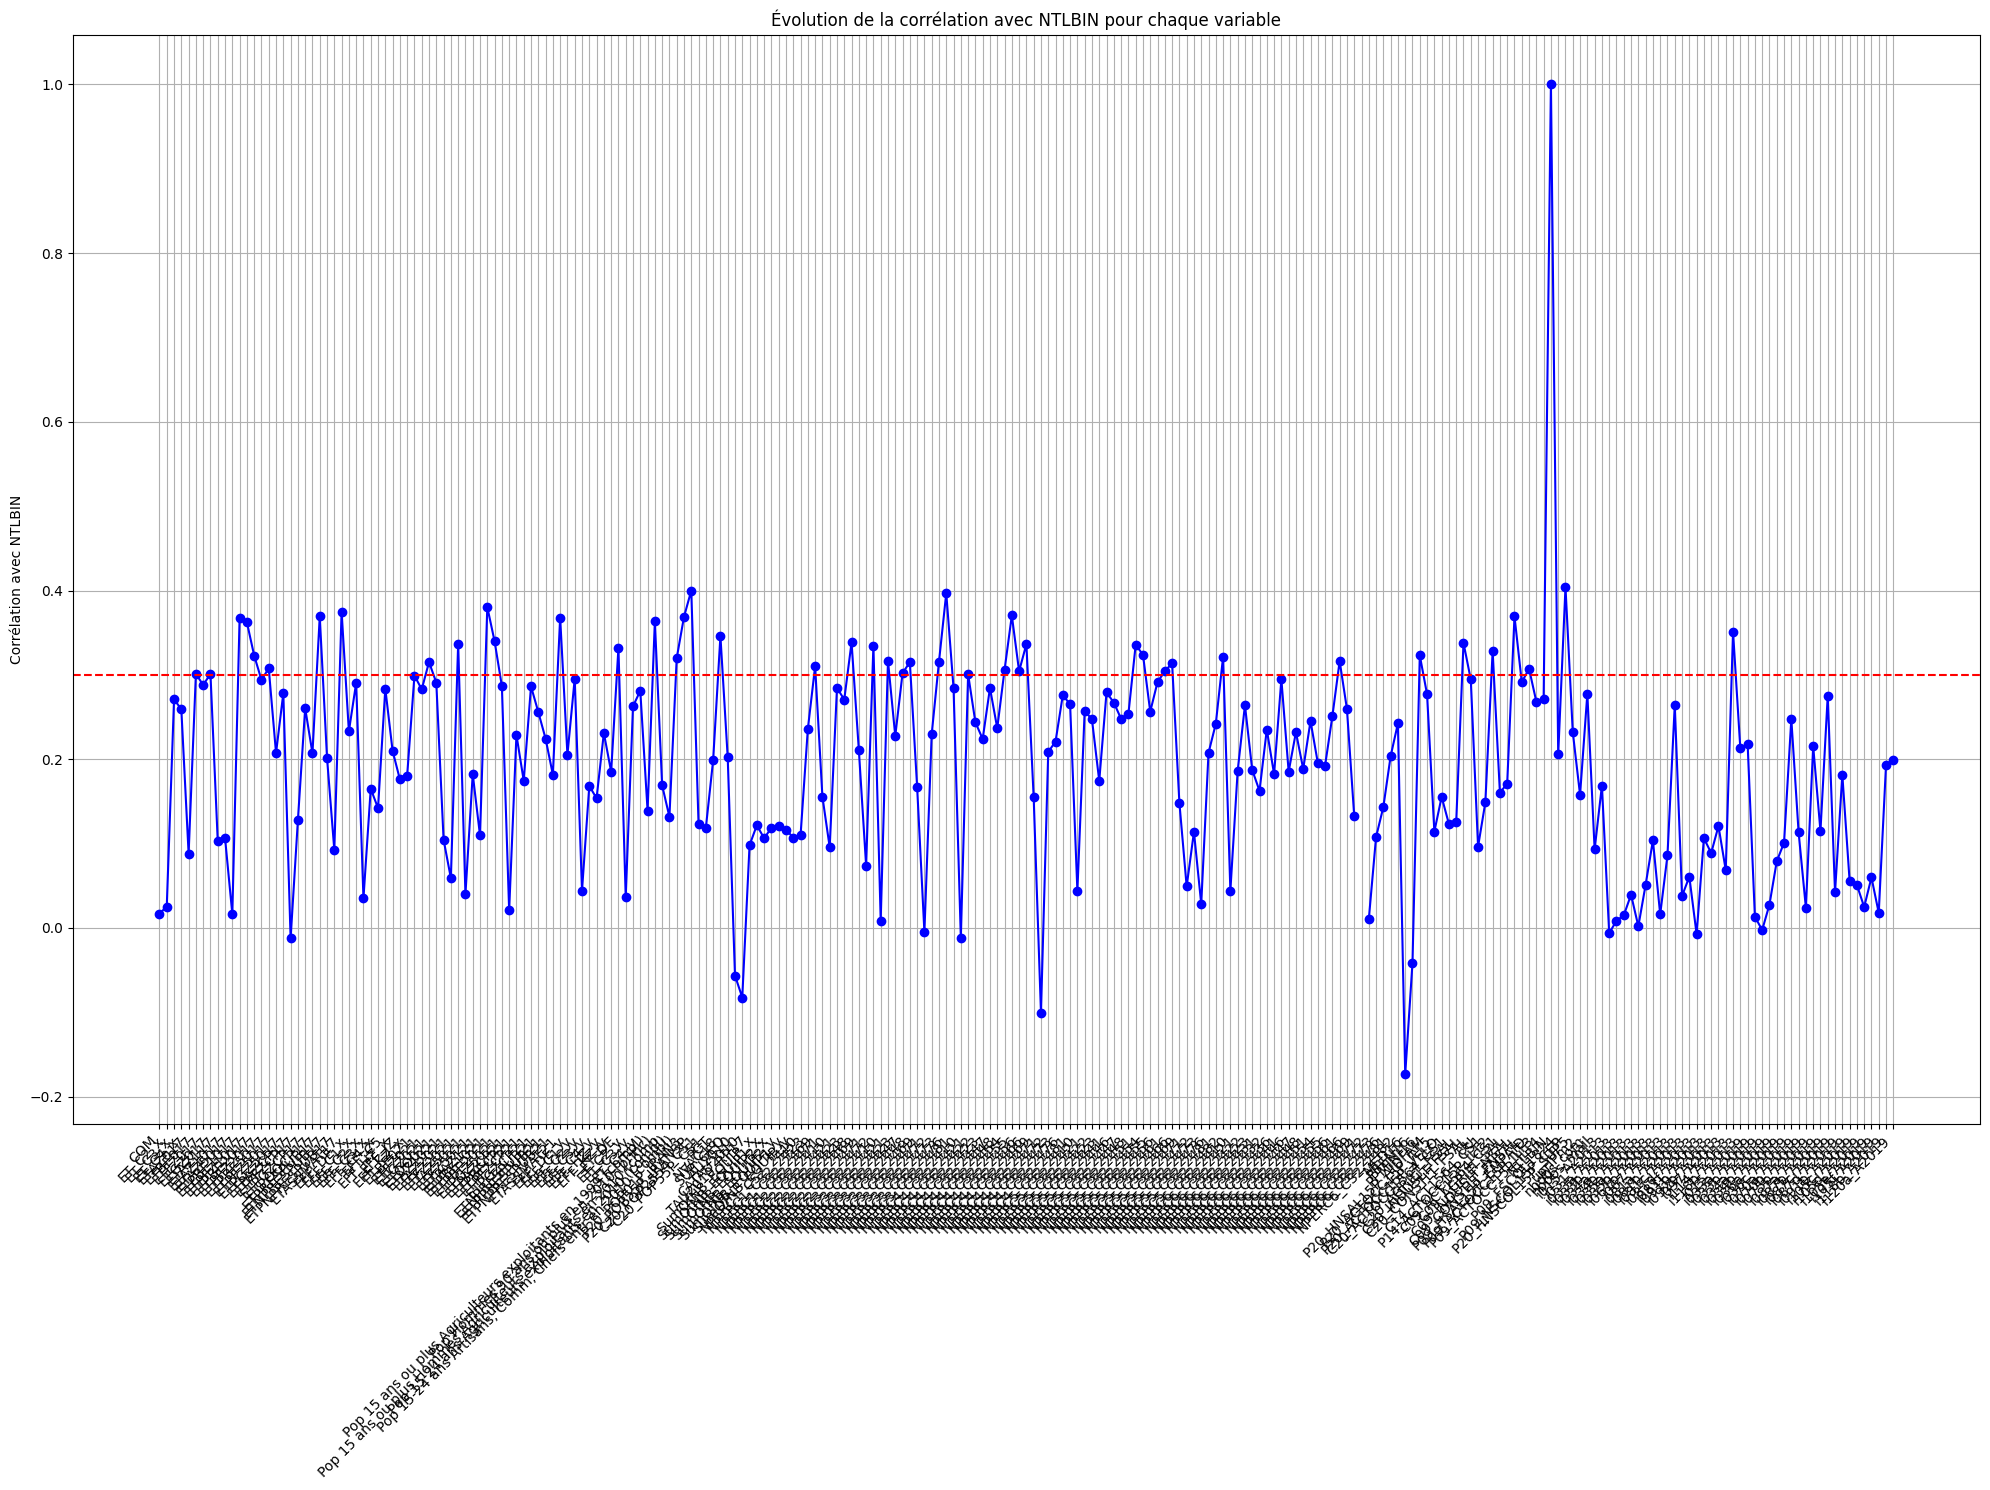

In [51]:
plt.figure(figsize=(20, 15))
plt.plot(correlations.index, correlations.values, color='blue', marker='o')
plt.axhline(y=0.3,color='r',linestyle='--')
plt.ylabel('Corrélation avec NTLBIN')
plt.title('Évolution de la corrélation avec NTLBIN pour chaque variable')
plt.grid(True)
plt.xticks(ticks=correlations.index, labels=correlations.index,ha='right',rotation=45)
plt.tight_layout()
plt.show()


In [4]:
min_values = data.min()

data= data.fillna(min_values)
data.replace([np.inf, -np.inf], 3000, inplace=True)

In [ ]:
from sklearn.feature_selection import VarianceThreshold
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd
import numpy as np

# Définition de la fonction pour calculer le VIF

def calculate_vif(X):
    vif_data = pd.DataFrame()
    vif_data["Variable"] = X.columns
    vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return vif_data

# Initialisation de X avec vos données (en supprimant la variable cible)
X = data.drop(columns=['NTLBIN'])

# Calcul des VIF initiaux
vif_data = calculate_vif(X)
print("VIF initiaux:")
print(vif_data)

# Seuil initial pour le VIF élevé
high_vif_threshold = 2



# Si le nombre de variables restantes est <= 100, supprimer une par une

while vif_data['VIF'].max() > high_vif_threshold:
    max_vif_variable = vif_data.sort_values('VIF', ascending=False)['Variable'].iloc[0]
    print(f'Suppression de la variable avec le VIF le plus élevé: {max_vif_variable}')
    X = X.drop(columns=[max_vif_variable])
    vif_data = calculate_vif(X)
    vif_data = vif_data.dropna()

    print(vif_data)

print('Variables restantes après suppression des variables à forte multicolinéarité:')
print(X.columns)


In [51]:
#Z=X.columns

#Z1=Z



Index(['COM', 'ET_C2_x', 'ET_C4_x', 'ETAZ017', 'ETBE017', 'ETFZ017',
       'ETAZ1017', 'ETAZ5017', 'ETPFZ1017', 'ETPFZ2017',
       ...
       'i087b_A2019', 'i087c_A2019', 'i087d_A2019', 'i091b_A2019',
       'i105c_A2019', 'i105d_A2019', 'i105e_A2019', 'i105f_A2019',
       'i118b_A2019', 'i120a_A2019'],
      dtype='object', length=160)

In [8]:
data0=data[colonnes]
data0.to_csv('dabtafinalevar.csv',index=False)

In [33]:
colonnes=[]
for txt in Z1:
    colonnes.append(txt)

colonnes.append('NTLBIN')
X=data[colonnes]
X=X.drop('COM',axis=1)


#X.drop('NTLBIN',axis=1)
y = data['NTLBIN']
'''
# Séparer les données en ensembles d'entraînement et de test
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
log_reg = sm.Logit(y, X)
result = log_reg.fit()

# Afficher le résumé du modèle
print(result.summary())
'''


"\n# Séparer les données en ensembles d'entraînement et de test\n#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)\nlog_reg = sm.Logit(y, X)\nresult = log_reg.fit()\n\n# Afficher le résumé du modèle\nprint(result.summary())\n"

In [65]:
from sklearn.utils import resample

df_majority = data.loc[data.NTLBIN == 0].copy()
df_minority = data.loc[data.NTLBIN == 1].copy()

# Upsample minority class
df_minority_upsampled = resample(df_minority,
                             replace=True,  # sample with replacement
                             n_samples=4113,  # to match majority class
                             random_state=123)  # reproducible results

# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_majority, df_minority_upsampled])

# Display new class counts
print(df_upsampled.NTLBIN.value_counts())

NTLBIN
0    4113
1    4113
Name: count, dtype: int64


In [66]:
colonnes=[]
for txt in Z1:
    colonnes.append(txt)

#colonnes.append('NTLBIN')
X=df_upsampled[colonnes]
#X=X.drop('COM',axis=1)
#X.drop('NTLBIN',axis=1)
y = df_upsampled['NTLBIN']
'''
# Séparer les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
log_reg = sm.Logit(y, X)
result = log_reg.fit()

# Afficher le résumé du modèle
print(result.summary())
'''

"\n# Séparer les données en ensembles d'entraînement et de test\nX_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)\nlog_reg = sm.Logit(y, X)\nresult = log_reg.fit()\n\n# Afficher le résumé du modèle\nprint(result.summary())\n"

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


log_reg=LogisticRegression(max_iter=5000)
log_reg.fit(X_train_scaled, y_train)

# Faire des prédictions sur l'ensemble de test
y_pred = log_reg.predict(X_test_scaled)

# Afficher les résultatsa
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nAccuracy Score:")
print(accuracy_score(y_test, y_pred))

In [ ]:
import itertools
from sklearn.metrics import f1_score
# Définir la taille de test et la graine aléatoire
test_size = 0.2
random_state = 42

# Initialiser le scaler
scaler = StandardScaler()

# Obtenir toutes les combinaisons possibles de 5 variables parmi les 68
combinaisons = list(itertools.combinations(range(X.shape[1]), 5))

# Initialiser des listes pour stocker les résultats
selected_combinations = []
selected_confusion_matrices = []
selected_classification_reports = []
selected_accuracy_scores = []
selected_f1_scores = []
i=0
for combinaison in combinaisons:
    i+=1
    # Sélectionner les colonnes pour la combinaison actuelle
    X_subset = X.iloc[:, list(combinaison)]
    
    # Diviser les données en ensembles d'entraînement et de test
    X_train, X_test, y_train, y_test = train_test_split(X_subset, y, test_size=test_size, random_state=random_state)
    
    # Mettre à l'échelle les données
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Initialiser et ajuster le modèle
    log_reg = LogisticRegression(max_iter=5000)
    log_reg.fit(X_train_scaled, y_train)

    # Faire des prédictions sur l'ensemble de test
    y_pred = log_reg.predict(X_test_scaled)

    # Calculer le F1 score
    f1 = f1_score(y_test, y_pred, average='weighted')
    #print(f1)
    # Si le F1 score est supérieur à 0.7, stocker les résultats
    if f1 > 0.75:
        selected_combinations.append(combinaison)
        selected_confusion_matrices.append(confusion_matrix(y_test, y_pred))
        selected_classification_reports.append(classification_report(y_test, y_pred, output_dict=True))
        selected_accuracy_scores.append(accuracy_score(y_test, y_pred))
        selected_f1_scores.append(f1)
    if i%1000==0:
        print(i)
# Afficher les résultats pour chaque combinaison sélectionnée
for idx, combinaison in enumerate(selected_combinations):
    print(f"Combinaison de variables: {combinaison}")
    print("Confusion Matrix:")
    print(selected_confusion_matrices[idx])
    print("\nClassification Report:")
    print(selected_classification_reports[idx])
    print("\nAccuracy Score:")
    print(selected_accuracy_scores[idx])
    print("\nF1 Score:")
    print(selected_f1_scores[idx])
    print("\n--------------------------------------\n")


In [45]:
len(selected_combinations)

2388

In [93]:
from sklearn.model_selection import cross_val_score, KFold,GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier


scaler = StandardScaler()

# Adapter le scaler aux données d'entraînement et transformer les données d'entraînement
X_train_scaled = scaler.fit_transform(X_train)
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# Transformer les données de test en utilisant le scaler adapté aux données d'entraînement
X_test_scaled = scaler.transform(X_test)# Supposons que 'model' est votre modèle déjà entraîné
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Prédire sur les données de test
y_pred = model.predict(X_test)
scores = cross_val_score(model, X_train, y_train, cv=kf, scoring='f1')

print("Scores de  après validation croisée : ", scores)
print("Moyenne du  Score : ", scores.mean())
print("Écart-type des scores:", scores.std())

Scores de  après validation croisée :  [0.78296478 0.78177458 0.78017586 0.79318358 0.78589007]
Moyenne du  Score :  0.7847977750130595
Écart-type des scores: 0.00459078401824968


In [ ]:
param_grid = {
    'C': [0.1, 1.0, 10.0, 100.0],  # Paramètre de régularisation
    'penalty': ['l1', 'l2']       # Type de pénalité
}

# Initialiser le GridSearchCV
grid_search = GridSearchCV(estimator=LogisticRegression(max_iter=5000),
                           param_grid=param_grid,
                           cv=5,
                           scoring='f1',
                           verbose=1)

# Effectuer la recherche sur grille sur l'ensemble d'entraînement
grid_search.fit(X_train_scaled, y_train)

# Afficher les meilleurs paramètres trouvés
print("Meilleurs paramètres : ", grid_search.best_params_)

# Utiliser le meilleur modèle pour faire des prédictions
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test_scaled)

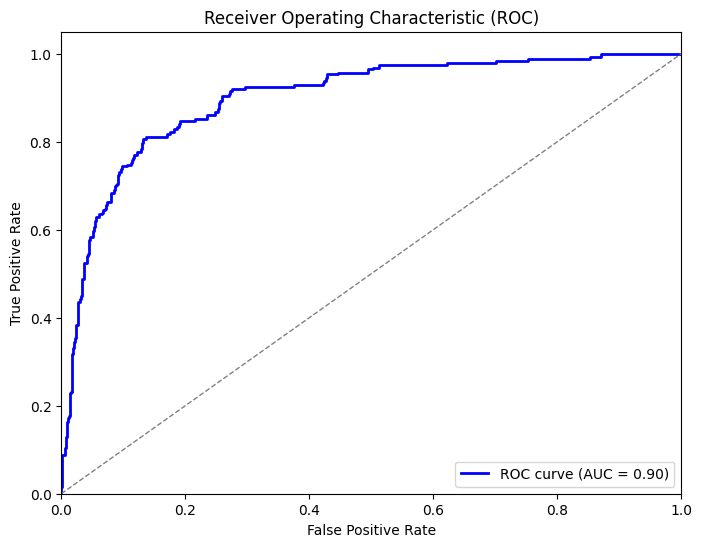

In [19]:
from sklearn.metrics import roc_curve, roc_auc_score
model = LogisticRegression()

# Entraînez le modèle sur l'ensemble d'apprentissage
model.fit(X_train_scaled, y_train)

# Prédisez les probabilités des classes pour l'ensemble de test
y_probs = model.predict_proba(X_test_scaled)[:, 1]

# Calculez la courbe ROC
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

auc_roc = roc_auc_score(y_test, y_probs)


plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % auc_roc)
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()



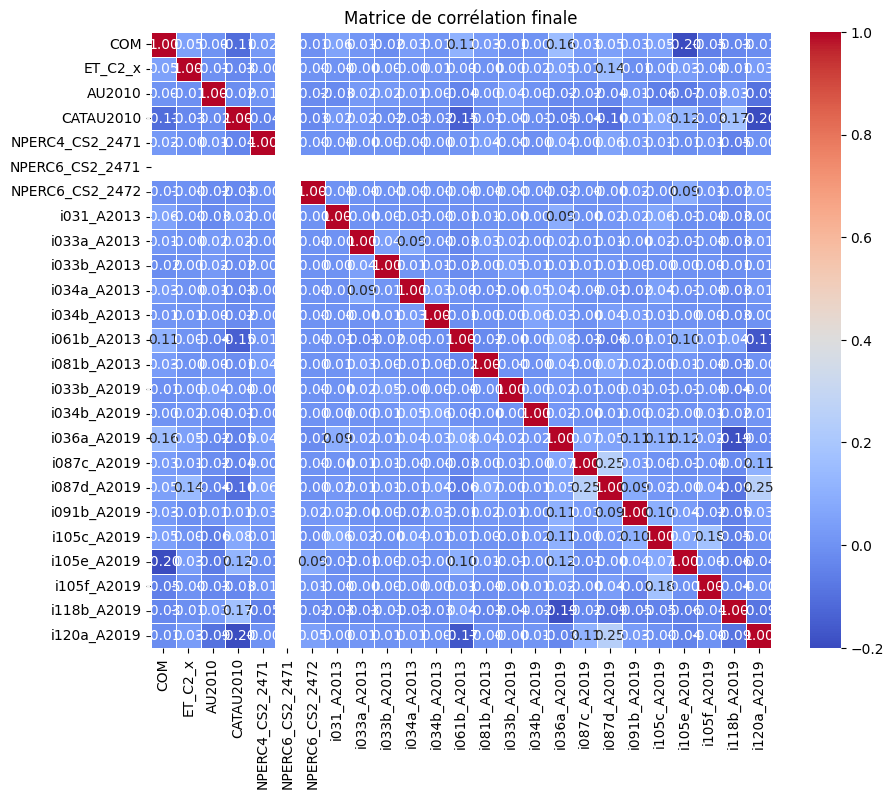

In [172]:
numerical_data = data.select_dtypes(exclude=['object'])

# Calculer la matrice de corrélation
correlation_matrix = numerical_data.corr()

# Boucle jusqu'à ce qu'il n'y ait plus de corrélations supérieures à 0.90
while True:
    # Trouver les paires de variables fortement corrélées
    upper = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))
    high_corr = (upper > 0.5).any()
    
    # Sortir de la boucle si aucune corrélation supérieure à 0.90 n'est trouvée
    if not high_corr.any():
        break

    # Identifier la première variable corrélée
    first_high_corr = high_corr.index[high_corr.argmax()]
    
    # Identifier les variables corrélées avec la première variable
    corr_with_first = correlation_matrix[first_high_corr][correlation_matrix[first_high_corr] > 0.1].index.tolist()

    # Supprimer une des variables corrélées
    numerical_data.drop(corr_with_first[1], axis=1, inplace=True)

    # Recalculer la matrice de corrélation
    correlation_matrix = numerical_data.corr()
# Tracer la matrice de corrélation finale avec Seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title("Matrice de corrélation finale")
plt.show()


In [112]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

# Supposons que votre dataframe s'appelle 'data'
# Et que la variable cible s'appelle 'target'
colonnes=[]
for txt in Z1:
    colonnes.append(txt)

# 1. Séparer la variable cible des variables explicatives
#X = data[colonnes]
#y = data['NTLBIN']

# 2. Standardiser les variables explicatives
scaler = StandardScaler()
X_standardized = scaler.fit_transform(X)

# 3. Appliquer l'ACP sur les variables explicatives
pca = PCA(n_components=6)  # Garder suffisamment de composantes pour expliquer 95% de la variance
X_pca = pca.fit_transform(X_standardized,y)

top_vars_indices = []
for i in range(pca.n_components_):
    top_vars = np.argsort(np.abs(pca.components_[i]))[-10:]  # Sélection des 10 plus grandes valeurs absolues
    top_vars_indices.extend(top_vars)

# Convertir les indices en unique pour éviter les doublons
top_vars_indices = np.unique(top_vars_indices)

# 5. Utiliser les variables sélectionnées pour entraîner le modèle de régression logistique
X_selected = X.iloc[:, top_vars_indices]

X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.758809234507898
Confusion Matrix:
 [[640 190]
 [207 609]]
Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.77      0.76       830
           1       0.76      0.75      0.75       816

    accuracy                           0.76      1646
   macro avg       0.76      0.76      0.76      1646
weighted avg       0.76      0.76      0.76      1646



c:\Users\mohci\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
model = LogisticRegression()

# Entraînez le modèle sur l'ensemble d'apprentissage
model.fit(X_train_scaled, y_train)

# Prédisez les probabilités des classes pour l'ensemble de test
y_probs = model.predict_proba(X_test_scaled)[:, 1]

# Calculez la courbe ROC
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

auc_roc = roc_auc_score(y_test, y_probs)


plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % auc_roc)
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()



In [84]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

# Appliquer LDA
lda = LDA(n_components=1)  # Nombre de composantes à conserver
X_lda = lda.fit_transform(X_standardized, y)

# Réentraîner le modèle de régression linéaire avec les composantes LDA
X_train, X_test, y_train, y_test = train_test_split(X_lda, y, test_size=0.2, random_state=42)
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("Mean Squared Error with LDA components:", mean_squared_error(y_test, y_pred))
print("R2 Score with LDA components:", r2_score(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Mean Squared Error with LDA components: 0.16707168894289187
R2 Score with LDA components: 0.33166489487361206
Accuracy: 0.8329283110571082
Confusion Matrix:
 [[736  94]
 [181 635]]
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.89      0.84       830
           1       0.87      0.78      0.82       816

    accuracy                           0.83      1646
   macro avg       0.84      0.83      0.83      1646
weighted avg       0.84      0.83      0.83      1646



In [130]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

# Supposons que votre dataframe s'appelle 'data'
# Et que la variable cible s'appelle 'NTLBIN'
# colonnes = liste des noms de colonnes que vous souhaitez utiliser

# 1. Séparer la variable cible des variables explicatives
# X = data[colonnes]
# y = data['NTLBIN']

# 2. Standardiser les variables explicatives
scaler = StandardScaler()
X_standardized = scaler.fit_transform(X)

# 3. Appliquer LDA sur les variables explicatives
lda = LDA(n_components=1)  # Réduire les dimensions à 1 composante LDA
X_lda = lda.fit_transform(X_standardized, y)

# 4. Sélectionner les variables les plus importantes avec LDA
top_vars_indices = np.argsort(np.abs(lda.coef_[0]))[-7:]  # Indices des 10 plus grandes valeurs absolues

# 5. Utiliser les variables sélectionnées pour entraîner le modèle de régression logistique
X_selected = X.iloc[:, top_vars_indices]

X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.7648845686512759
Confusion Matrix:
 [[677 153]
 [234 582]]
Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.82      0.78       830
           1       0.79      0.71      0.75       816

    accuracy                           0.76      1646
   macro avg       0.77      0.76      0.76      1646
weighted avg       0.77      0.76      0.76      1646



In [136]:
data99=data[list(X_selected.columns)]
data99['NTLBIN'] =data['NTLBIN']

C:\Users\mohci\AppData\Local\Temp\ipykernel_2276\977835473.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data99['NTLBIN'] =data['NTLBIN']


In [144]:
data99.describe()

,i081a_A2013,NPERC2_CS2_2423,NPERC6_CS2_2436,ETPGZCP17,NPERC4_CS2_2455,PPMINI16,ETPFZ1017,NTLBIN,COM
count,4309.000000,4309.000000,4309.000000,4309.000000,4309.000000,4309.000000,4309.000000,4309.000000,4309.000000
mean,0.159202,0.663959,0.210026,13.732421,1.201903,0.651079,5.584358,0.045486,41452.685078
std,0.391052,4.335388,2.358283,114.769969,5.995285,0.554124,22.718262,0.208392,24135.612702
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0.000000,0.000000,16001.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0.000000,0.000000,19259.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0.000000,0.000000,33299.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0.000000,0.000000,64193.000000
max,4.000000,171.000000,124.000000,4497.000000,179.000000,8.300000,488.000000,1.000000,87206.000000


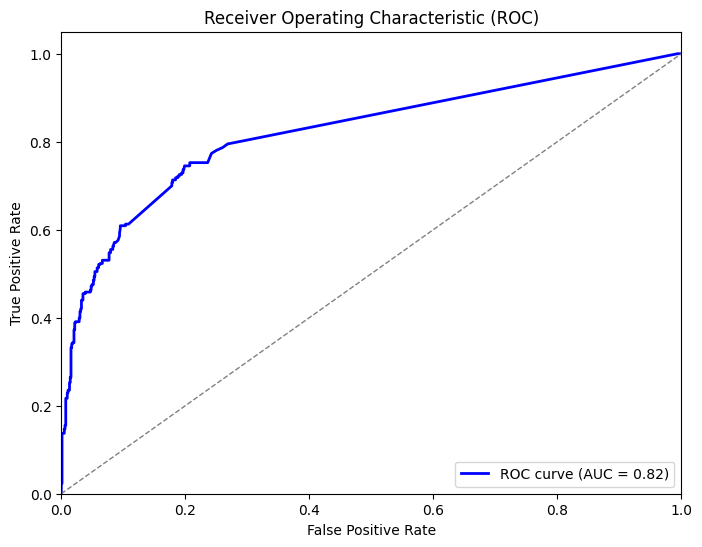

In [140]:
from sklearn.metrics import roc_curve, roc_auc_score
model = LogisticRegression()

# Entraînez le modèle sur l'ensemble d'apprentissage
model.fit(X_train, y_train)

# Prédisez les probabilités des classes pour l'ensemble de test
y_probs = model.predict_proba(X_test)[:, 1]

# Calculez la courbe ROC
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

auc_roc = roc_auc_score(y_test, y_probs)


plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % auc_roc)
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()



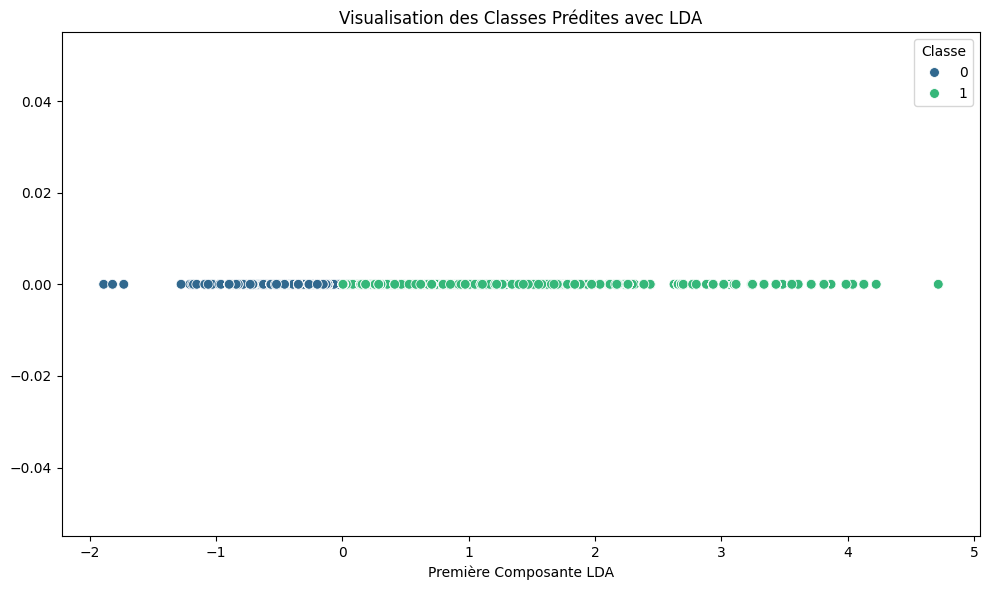

In [96]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

# Supposons que vous ayez déjà standardisé vos données X_standardized et défini vos cibles y

# 1. Appliquer LDA
lda = LDA(n_components=1)
X_lda = lda.fit_transform(X_selected, y)

# 2. Prédire les classes
y_pred = lda.predict(X_selected)

# 3. Visualiser les classes prédites
# Convertir X_lda en DataFrame pour faciliter la visualisation (facultatif)
df_lda = pd.DataFrame(X_lda, columns=['LDA_Component_1'])

# Ajouter la classe prédite à df_lda
df_lda['Predicted_Class'] = y_pred

# Plot avec seaborn
plt.figure(figsize=(10, 6))
sns.scatterplot(x='LDA_Component_1', y=0, hue='Predicted_Class', data=df_lda, palette='viridis', s=50)
plt.title('Visualisation des Classes Prédites avec LDA')
plt.xlabel('Première Composante LDA')
plt.ylabel('')

plt.legend(title='Classe', loc='upper right')
plt.tight_layout()
plt.show()


In [110]:
data[['P20_HNSAL15P_AIDFAM','NTLBIN']].corr()['NTLBIN']

P20_HNSAL15P_AIDFAM    0.276981
NTLBIN                 1.000000
Name: NTLBIN, dtype: float64